Here is a description of the rows of the dataset:

Index: the index number of a row

Address: the address of the ethereum account

FLAG: whether the transaction is fraud or not

Avg min between sent tnx: Average time between sent transactions for account in minutes

Avg_min_between_received_tnx: Average time between received transactions for account in minutes

Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction

Sent_tnx: Total number of sent normal transactions

Received_tnx: Total number of received normal transactions

Number_of_Created_Contracts: Total Number of created contract transactions

Unique_Received_From_Addresses: Total Unique addresses from which account received transactions

Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions

Min_Value_Received: Minimum value in Ether ever received

Max_Value_Received: Maximum value in Ether ever received

Avg_Value_Received5Average value in Ether ever received

Min_Val_Sent: Minimum value of Ether ever sent

Max_Val_Sent: Maximum value of Ether ever sent

Avg_Val_Sent: Average value of Ether ever sent

Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract

Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract

Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts

Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions

Total_Ether_Sent:Total Ether sent for account address

Total_Ether_Received: Total Ether received for account address

Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses

Total_Ether_Balance: Total Ether Balance following enacted transactions

Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions

ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether

ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether

ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether

ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses

ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses

ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses

ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes

ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes

ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions

ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account

ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account

ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account

ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account

ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account

ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account

ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred

ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received

ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction

ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

In [11]:
# libraries
import pandas as pd
import numpy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# Load the dataset
eth_ds = pd.read_csv('./Dataset/transaction_dataset.csv')

In [6]:
eth_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

### Feature Analysis
<i>From the above columns, we wish to extract and engineer a set of features that will help us classify the transaction as fraudulent or safe.</i>

- total value in ETH sent by a wallet
- total received value in ETH by a wallet
- A number of transactions sent by a wallet
- A number of transactions received by a wallet over a time period
- average time between transactions performed bysending wallet
- average time between transactions to a receiving wallet
- standard deviation of time between transactions performed by a sending wallet
- standard deviation of transaction time in seconds to receiving wallet - standard deviation of time between transactions to a receiving wallet
- average value in ETH sent by a wallet
- average value in ETH received by a wallet

In [8]:
# List of columns having same data through out the dataset.
zero_feature_list = eth_ds.columns[(eth_ds.nunique() == 1)].tolist()
for col in zero_feature_list:
    print(col)
    print(eth_ds[col].unique())
    print()

 ERC20 avg time between sent tnx
[ 0. nan]

 ERC20 avg time between rec tnx
[ 0. nan]

 ERC20 avg time between rec 2 tnx
[ 0. nan]

 ERC20 avg time between contract tnx
[ 0. nan]

 ERC20 min val sent contract
[ 0. nan]

 ERC20 max val sent contract
[ 0. nan]

 ERC20 avg val sent contract
[ 0. nan]



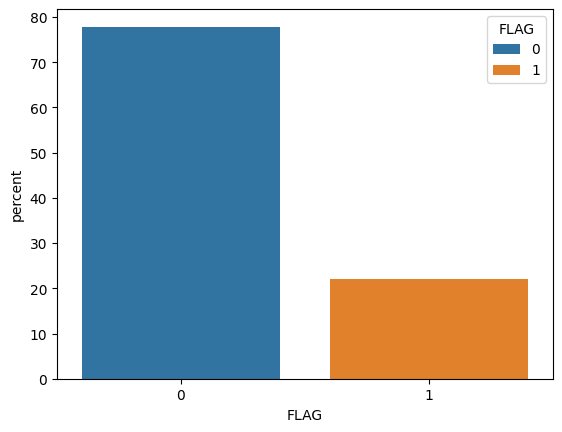

Total Records: 9841
Target:  FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64


In [37]:
sns.countplot(x=eth_ds.FLAG,hue=eth_ds.FLAG,stat='percent')
plt.show()
print('Total Records:', eth_ds.FLAG.shape[0])
print('Target: ', eth_ds['FLAG'].value_counts(normalize=True))

From the above plot, we can observe a major imbalance in the dataset. We can observe that 22% of the total transactions are fraudulent.